# 0.0 IMPORTS AND HELP FUNCTIONS

## 0.1 Imports

In [120]:
import pandas as pd
import psycopg2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2 Help Functions

In [121]:
#Logando no Banco de Dados!
#def connect():
#    try:
#        conn = psycopg2.connect(database ="comunidadedsdb", 
#                                user = "member", 
#                                password = "xxxxx", 
#                                host = "comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com", 
#                                port = "5432")
#        cur = conn.cursor()


#    except (Exception, psycopg2.DatabaseError) as error:
#            print ("Error while creating PostgreSQL table", error)
#    return cur, conn

    

## 0.3 Querys and Data Creation

In [122]:
#Criando as tabelas e mergeando.

#cur, con = connect()
#cur.execute('SELECT * FROM pa004.insurance;')
#data = cur.fetchall()
#df1 = pd.DataFrame(data, columns=['id', 'previously_insured', 'annual_premium', 'vintage', 'response'])
#cur.execute('SELECT * FROM pa004.users;')
#data = cur.fetchall()
#df2 = pd.DataFrame(data, columns=['id', 'gender', 'age', 'region_code', 'policy_sales_channel'])
#cur.execute('SELECT * FROM pa004.vehicle;')
#data = cur.fetchall()
#df3 = pd.DataFrame(data, columns=['id', 'driving license', 'vehicle_age', 'vehicle_damage'])
#df = pd.merge(df1, df2, how='inner', on='id')
#df = pd.merge(df, df3, how='inner', on='id')
#df.to_csv('data/health_insurance_cross_sell', index=False)
#cur.close
#con.close


In [123]:
df_raw = pd.read_csv('data/health_insurance_cross_sell.csv')
df_raw

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving license,vehicle_age,vehicle_damage
0,1,0,40454.0,217,1,Male,44,28.0,26.0,1,> 2 Years,Yes
1,2,0,33536.0,183,0,Male,76,3.0,26.0,1,1-2 Year,No
2,3,0,38294.0,27,1,Male,47,28.0,26.0,1,> 2 Years,Yes
3,4,1,28619.0,203,0,Male,21,11.0,152.0,1,< 1 Year,No
4,5,1,27496.0,39,0,Female,29,41.0,152.0,1,< 1 Year,No
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,30170.0,88,0,Male,74,26.0,26.0,1,1-2 Year,No
381105,381106,1,40016.0,131,0,Male,30,37.0,152.0,1,< 1 Year,No
381106,381107,1,35118.0,161,0,Male,21,30.0,160.0,1,< 1 Year,No
381107,381108,0,44617.0,74,0,Female,68,14.0,124.0,1,> 2 Years,Yes


# 1.0 DATA DESCRIPTION

In [124]:
df1 = df_raw.copy()

## 1.1 Columns Names

In [125]:
df1 = df1.rename(columns={'driving license': 'driving_license'})

## 1.2 Data Dimension

In [126]:
print(f'O número de linhas é: {df1.shape[0]}')
print(f'O número de colunas é: {df1.shape[1]}')


O número de linhas é: 381109
O número de colunas é: 12


## 1.3 Features Types

In [127]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## 1.4 N.A Check 

In [128]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.5 Change Types

In [129]:
# Changing region code to INT64
df1['region_code'] = np.int64(df1['region_code'])

## 1.6 Descriptive Statistics 

In [130]:
num_attribute = df1.select_dtypes(include=['int64', 'float64'])
cat_attribute = df1.select_dtypes(exclude=['int64', 'float64'])

### 1.6.1 Numerical Variables 

In [131]:
# Central Tendency - Mean and Median
Smean = pd.DataFrame(num_attribute.apply(np.mean)).T
Smedian = pd.DataFrame(num_attribute.apply(np.median)).T

# Range, Std, Min, Max, Skew, Kurtossis
Sstd = pd.DataFrame(num_attribute.apply(np.std)).T
Smin = pd.DataFrame(num_attribute.apply(np.min)).T
Smax = pd.DataFrame(num_attribute.apply(np.max)).T
Srange = pd.DataFrame(num_attribute.apply(lambda x: x.max() - x.min())).T
Sskew = pd.DataFrame(num_attribute.apply(lambda x: x.skew())).T
Skurt = pd.DataFrame(num_attribute.apply(lambda x: x.kurtosis())).T
statis_descri = pd.concat([Smean, Smedian, Sstd, Smin, Smax, Srange, Sskew, Skurt]).T.reset_index()
statis_descri.columns = ['index', 'media', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']
statis_descri

,index,media,median,std,min,max,range,skew,kurtosis
0,id,190555.000000,190555.0,110016.691870,1.0,381109.0,381108.0,9.443274e-16,-1.200000
1,previously_insured,0.458210,0.0,0.498251,0.0,1.0,1.0,1.677471e-01,-1.971871
2,annual_premium,30564.389581,31669.0,17213.132474,2630.0,540165.0,537535.0,1.766087e+00,34.004569
3,vintage,154.347397,154.0,83.671194,10.0,299.0,289.0,3.029517e-03,-1.200688
4,response,0.122563,0.0,0.327935,0.0,1.0,1.0,2.301906e+00,3.298788
5,age,38.822584,36.0,15.511591,20.0,85.0,65.0,6.725390e-01,-0.565655
6,region_code,26.388807,28.0,13.229871,0.0,52.0,52.0,-1.152664e-01,-0.867857
7,policy_sales_channel,112.034295,133.0,54.203924,1.0,163.0,162.0,-9.000081e-01,-0.970810
8,driving_license,0.997869,1.0,0.046109,0.0,1.0,1.0,-2.159518e+01,464.354302


### 1.6.2 Categorical Variables

In [132]:
cat_attribute.apply(lambda x: x.unique().shape[0])

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

# 2.0 FEATURE ENGENEERING

In [133]:
df2 = df1.copy()

## 2.1 Hypotesis Creation

 1 - Previously insureds are more likely to reacquire a new insurance service. <i>FALSE</i><br> 
 2 - People with higher annual premium has more disposition to turn insure.<br>
 3 - People with higher vintage has more disposition to turn insure.<br>
 4 - Diferents genders has the same disposition to turn insure.<br>
 5 - Older people has more disposition to turn insure.<br>
 6 - Diferents regions has diferents dispostions to turn insure.<br>
 7 - People with driving license has more disposition to become insured.<br>
 8 - People with olders vehicles has more dispostion to become insured.<br>
 9 - People with damaged vehicles are more likely to become insured.<br>

In [134]:
df1

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,1,0,40454.0,217,1,Male,44,28,26.0,1,> 2 Years,Yes
1,2,0,33536.0,183,0,Male,76,3,26.0,1,1-2 Year,No
2,3,0,38294.0,27,1,Male,47,28,26.0,1,> 2 Years,Yes
3,4,1,28619.0,203,0,Male,21,11,152.0,1,< 1 Year,No
4,5,1,27496.0,39,0,Female,29,41,152.0,1,< 1 Year,No
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,30170.0,88,0,Male,74,26,26.0,1,1-2 Year,No
381105,381106,1,40016.0,131,0,Male,30,37,152.0,1,< 1 Year,No
381106,381107,1,35118.0,161,0,Male,21,30,160.0,1,< 1 Year,No
381107,381108,0,44617.0,74,0,Female,68,14,124.0,1,> 2 Years,Yes


### 2.2 FEATURE ENGENEERING

In [135]:
# Tranforming vehicle age to int
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 0 if x == '< 1 Year' else 1 if x == '1-2 Year' else 2  )
# Tranforming vehicle damage to int
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 0 if x == 'No' else 1)

# 3.0 EXPLORATORY DATA ANALYSIS

In [156]:
df3 = df2.copy()

## 3.1 Univariate Analysis

### 3.1.1 - Target Variable

c:\Users\Fernando Roney\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response', ylabel='count'>

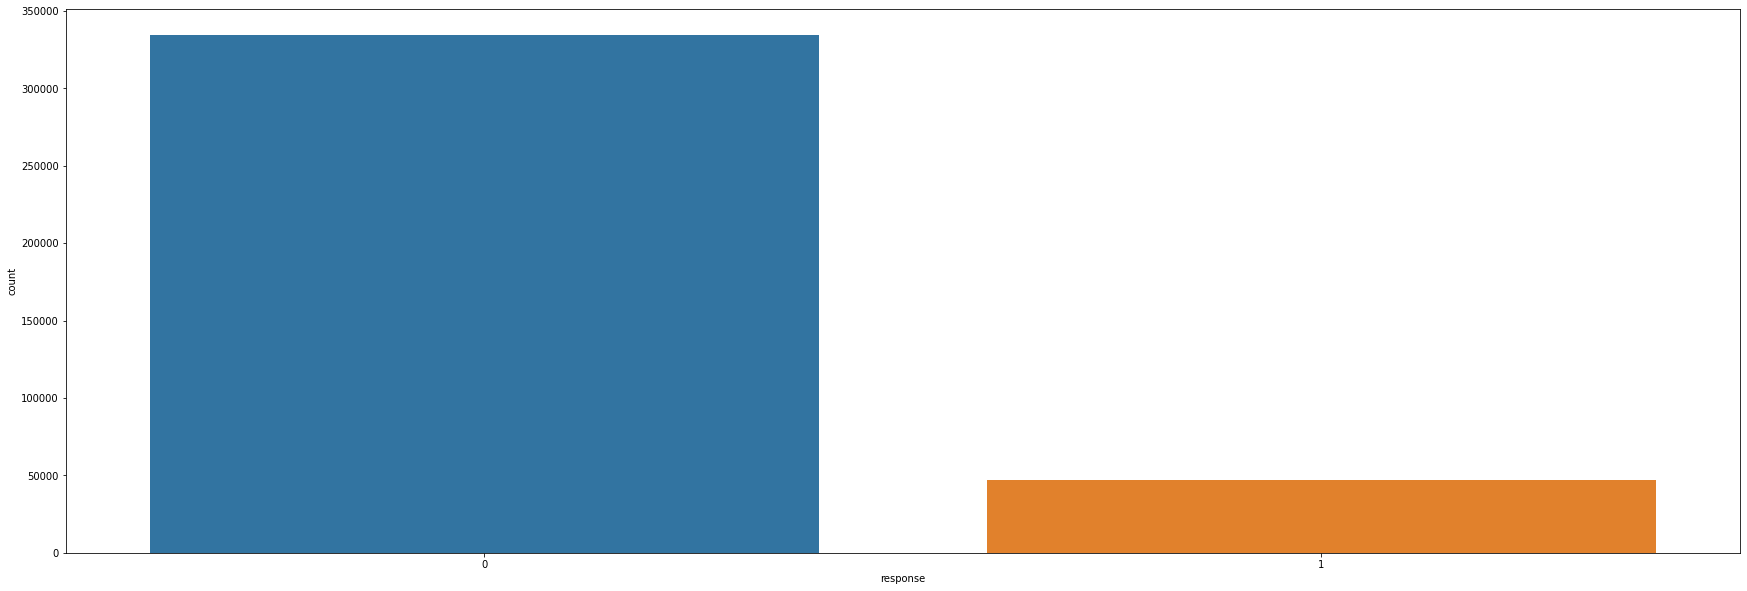

In [157]:
plt.figure(figsize=(30,10))
sns.countplot(df3['response'])

### 3.1.2 - Numerical Variable

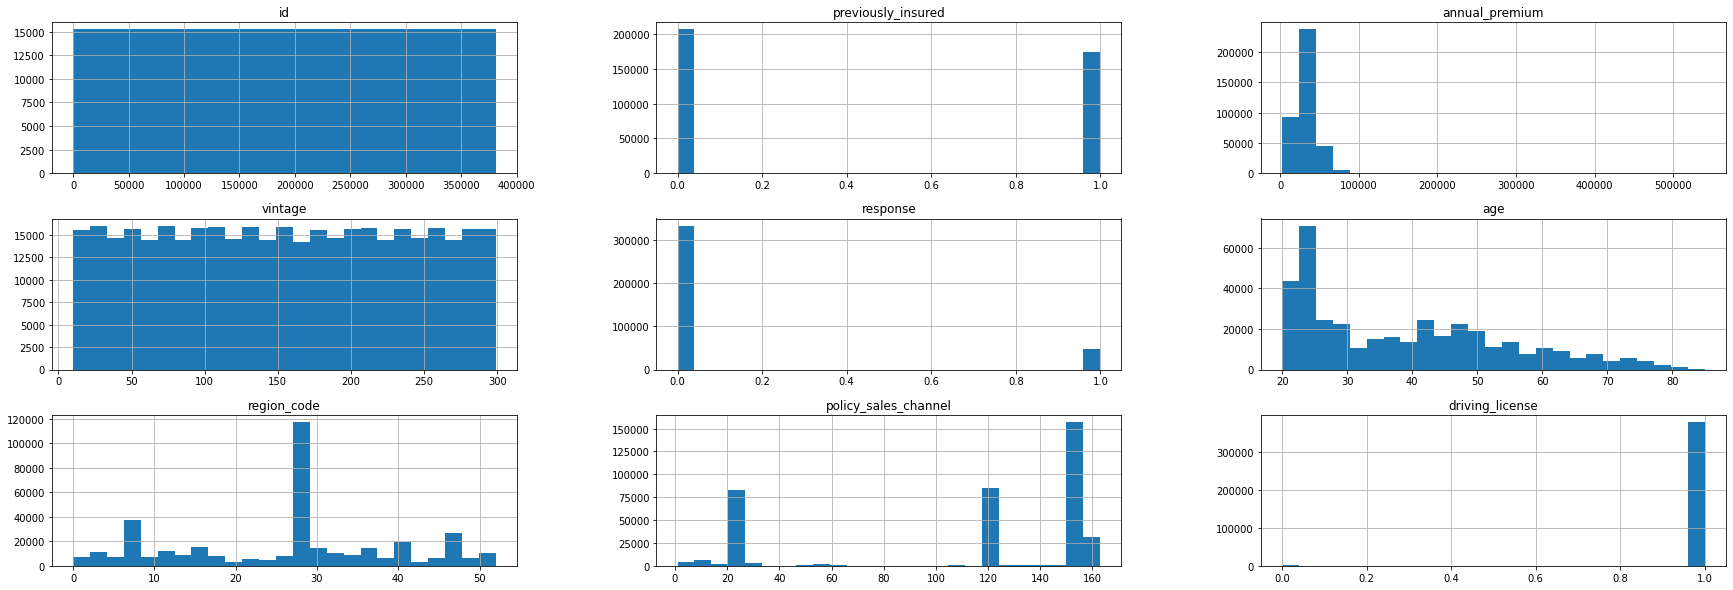

In [162]:
num_attribute.hist(bins=25, figsize = (30,10));

### 3.1.3 - Categorical Variable


## 3.2 Bivariate Analysis

#### 1 - Previously insureds are more likely to reacquire a new insurance service (FALSE)

In [180]:
aux1 = df3[['previously_insured', 'response']].groupby('previously_insured').mean().reset_index()
aux1

,previously_insured,response
0,0,0.225454
1,1,0.000905


#### 2 - People with lower annual premium has more disposition to turn insure. (TRUE)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

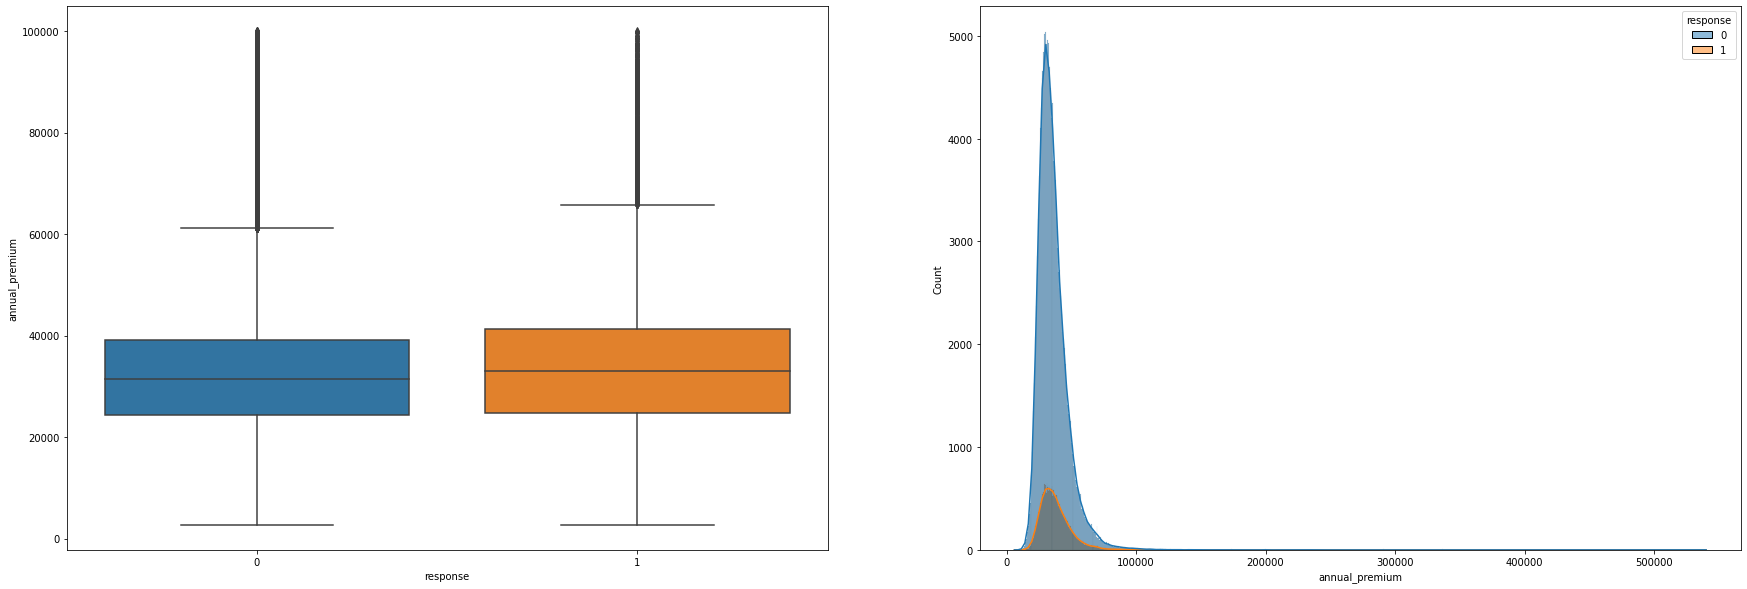

In [138]:
aux1 = df3[['annual_premium', 'response']]
aux1 = aux1[aux1['annual_premium'] < 100000]

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.boxplot(x='response', y='annual_premium', data=aux1)

plt.subplot(1,2,2)
aux2 = df3[df3['annual_premium'] > 3000]
sns.histplot(aux2, x="annual_premium", hue="response", kde = True)


#### 3 - People with higher vintage has more disposition to turn insure. (FALSE)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

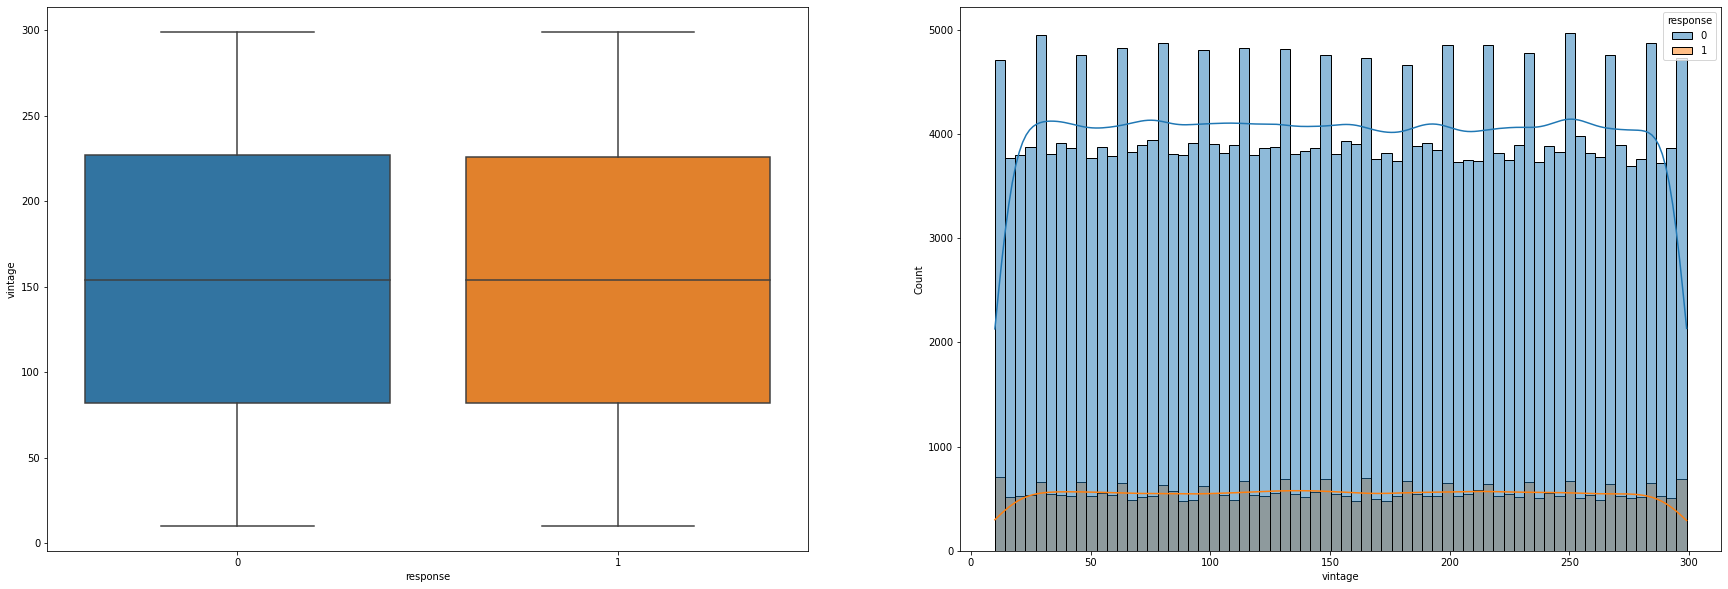

In [139]:
aux1 = df3[['vintage', 'response']]

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.boxplot(x='response', y='vintage', data=aux1)

plt.subplot(1,2,2)
sns.histplot(aux2, x='vintage', hue="response", kde = True)

#### 4 - Diferents genders has approximately same disposition to turn insure. (TRUE)

In [170]:
aux1 = df3[['gender', 'response']].groupby('gender').mean().reset_index()
aux1

,gender,response
0,Female,0.103902
1,Male,0.138411


#### 5 - Older people has more disposition to turn insure. (FALSE)

<AxesSubplot:xlabel='age', ylabel='response'>

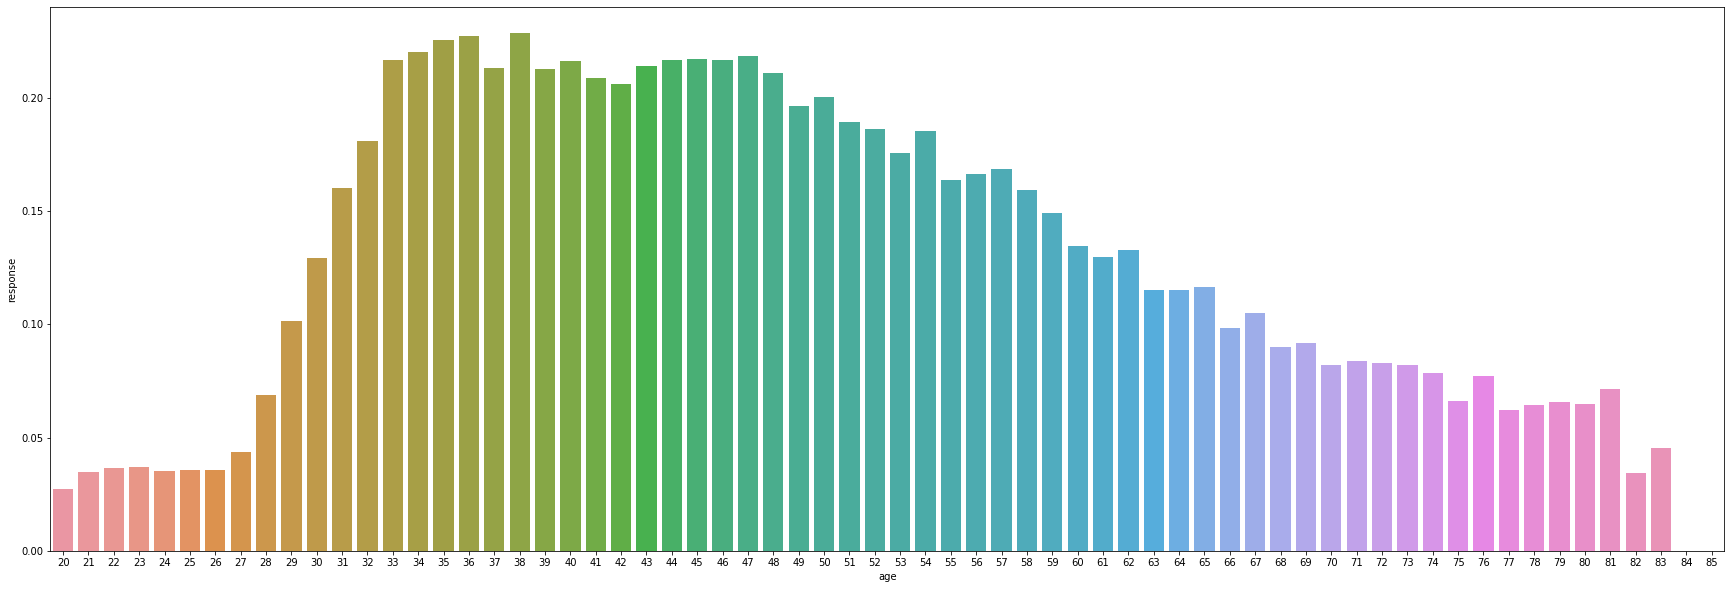

In [141]:
aux1 = df3[['age', 'response']].groupby('age').mean().reset_index()
plt.figure(figsize=(30, 10))
sns.barplot(x='age', y='response', data=aux1)

#### 6 - Diferents regions has diferents dispostions to turn insure. (TRUE)

<AxesSubplot:xlabel='region_code', ylabel='response'>

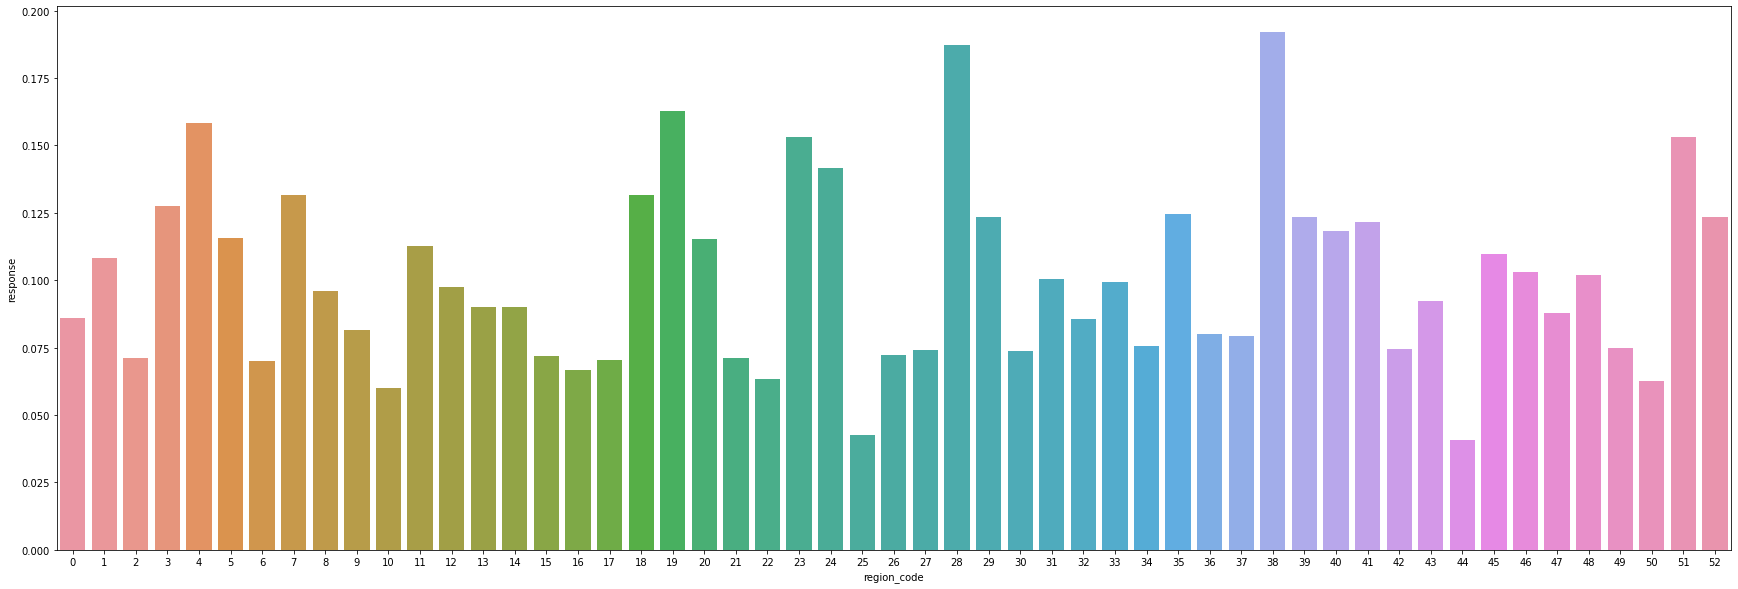

In [142]:
aux1 = df3[['region_code', 'response']].groupby('region_code').mean().reset_index()
plt.figure(figsize=(30, 10))
sns.barplot(x='region_code', y='response', data=aux1)

#### 7 - People with driving license has more disposition to become insured. (FALSE)

In [143]:
aux1 = df3[(df3['driving_license'] == 0) & (df3['response']  == 1)].shape[0] / df3[df3['driving_license'] == 0].shape[0] * 100
aux2 = df3[(df3['driving_license'] == 1) & (df3['response']  == 1)].shape[0] / df3[df3['driving_license'] == 1].shape[0] * 100

print('Das pessoas que tem não drive license {:,.2f}% de interesse em adquirir um novo seguro, e das pessoas que tem drive license {:,.2f}% tem de interesse de obter um seguro.'.format(aux2, aux1))

Das pessoas que tem não drive license 12.27% de interesse em adquirir um novo seguro, e das pessoas que tem drive license 5.05% tem de interesse de obter um seguro.


#### 8 - People with olders vehicles has more dispostion to become insured. (TRUE)

In [148]:
df3[['vehicle_age', 'response']].groupby('vehicle_age').mean().reset_index()



,vehicle_age,response
0,0,0.043705
1,1,0.173755
2,2,0.293746


#### 9 - People with damaged vehicles are more likely to become insured. (TRUE)

In [145]:
df3[['vehicle_damage', 'response']].groupby('vehicle_damage').mean().reset_index()

,vehicle_damage,response
0,0,0.005204
1,1,0.237655


# 4.0 DATA PREPARATION

In [175]:
df4 = df3.copy()